In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## NOMOR 1

In [2]:
df_car = pd.read_csv('all_cars.csv').reset_index()
df_car = df_car.rename(columns= {'index':'id'})
df_car

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
22261,22261,Toyota,IQ,2011,5500,Automatic,30000,Petrol,20,58.9,1.0
22262,22262,Toyota,Urban Cruiser,2011,4985,Manual,36154,Petrol,125,50.4,1.3
22263,22263,Toyota,Urban Cruiser,2012,4995,Manual,46000,Diesel,125,57.6,1.4
22264,22264,Toyota,Urban Cruiser,2011,3995,Manual,60700,Petrol,125,50.4,1.3


## NOMOR 2

In [3]:
df_car.describe(include='all')

,id,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
count,22266.000000,22266,22266,22266.000000,22266.000000,22266,22266.000000,22266,22266.000000,22266.000000,22266.000000
unique,NaN,3,60,NaN,NaN,4,NaN,4,NaN,NaN,NaN
top,NaN,Audi,Yaris,NaN,NaN,Manual,NaN,Petrol,NaN,NaN,NaN
freq,NaN,10668,2122,NaN,NaN,11806,NaN,12052,NaN,NaN,NaN
mean,11132.500000,NaN,NaN,2016.995509,17542.591575,NaN,23501.863604,NaN,115.473592,55.151181,1.688489
std,6427.784883,NaN,NaN,2.133576,10589.835312,NaN,21111.157417,NaN,68.835239,14.834181,0.566379
min,0.000000,NaN,NaN,1997.000000,850.000000,NaN,1.000000,NaN,0.000000,1.100000,0.000000
25%,5566.250000,NaN,NaN,2016.000000,9999.000000,NaN,7200.000000,NaN,30.000000,44.800000,1.400000
50%,11132.500000,NaN,NaN,2017.000000,14999.000000,NaN,18354.000000,NaN,145.000000,55.400000,1.600000
75%,16698.750000,NaN,NaN,2019.000000,21991.000000,NaN,33100.750000,NaN,145.000000,62.800000,2.000000


## NOMOR 3

In [ ]:
Variabel Kualitatif:
# Nominal: brand, model, transmission, fuelType
# Ordinal: -

Variabel Kuantitatif:
# Kontinu: mpg, engineSize
# Diskrit: year, price, mileage, tax

## NOMOR 4

Measure of Central Tendency adalah cara pengukuran untuk mengetahui nilai pusat (Central) dari kumupulan data, dimana pengukuran ini membantuk dalam memahami posisi data yang sedang di olah

In [4]:
df_car[['model', 'price']].describe(include='all')

,model,price
count,22266,22266.000000
unique,60,NaN
top,Yaris,NaN
freq,2122,NaN
mean,NaN,17542.591575
std,NaN,10589.835312
min,NaN,850.000000
25%,NaN,9999.000000
50%,NaN,14999.000000
75%,NaN,21991.000000


Measure of Central Tendency yang cocok untuk kolom 'model' dan 'price' adalah:
#### Model = Mode (freq)
#### Price = Mean or Median

In [5]:
df_car['model'].describe(include='object').loc['top']

'Yaris'

In [6]:
df_car['price'].describe().loc[['50%', 'mean']]


50%     14999.000000
mean    17542.591575
Name: price, dtype: float64

## NOMOR 5

Measure of Spread adalah cara pengukuran untuk melihat sebaran data dari kumpulan data yang diolah. Hal ini digunakan untuk mengetahui seberapa menyebar data yang ada

In [7]:
df_car['price'].describe().loc[['50%', 'mean']]

50%     14999.000000
mean    17542.591575
Name: price, dtype: float64

## NOMOR 6

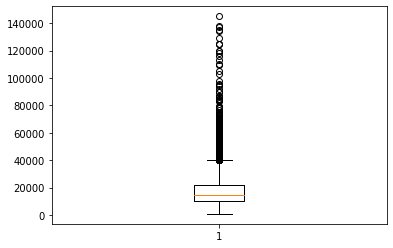

Dari hasil Box Plot diatas ditemukan adanya Outliers yang melebihi Upper Bound dengan jumlah Outliers
Outliers: 808


In [19]:
fig, ax = plt.subplots()
ax.boxplot(df_car['price'])


quartile_1, quartile_3 = np.percentile(df_car['price'], [25, 75])
iqr = quartile_3 - quartile_1

lower_bound = quartile_1 - 1.5 * iqr
upper_bound = quartile_3 + 1.5 * iqr

outliers = df_car['price'][(df_car['price']< lower_bound) | (df_car['price'] > upper_bound)].count()

plt.show()
print('Dari hasil Box Plot diatas ditemukan adanya Outliers yang melebihi Upper Bound dengan jumlah Outliers')
print(f'Outliers: {outliers}')

## NOMOR 7


In [26]:
skewness = df_car.skew(numeric_only=True)

right_skewed_columns = skewness[skewness > 0].index.tolist()

print("Kolom yang memiliki distribusi skewed ke kanan:", right_skewed_columns)

Kolom yang memiliki distribusi skewed ke kanan: ['price', 'mileage', 'tax', 'mpg', 'engineSize']


## NOMOR 8

In [ ]:
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.titlecolor'] = 'white'

<Figure size 1008x576 with 0 Axes>

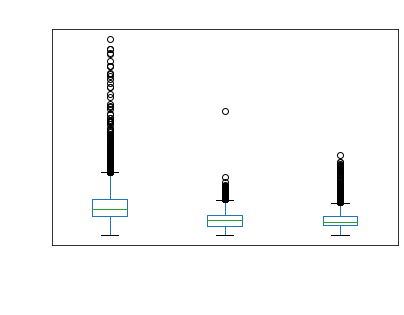

In [34]:
plt.figure(figsize=(14, 8))
df_car.boxplot(column='price', by='brand', grid=False, rot=90)
plt.show()

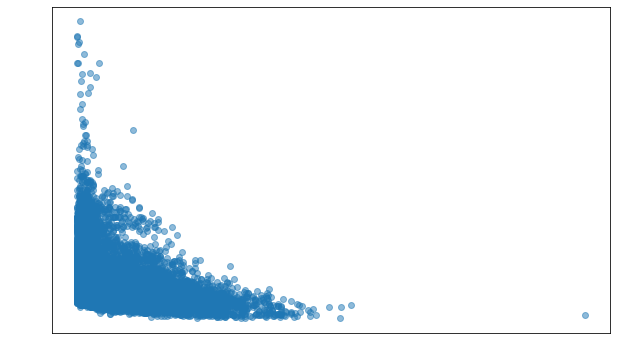

In [32]:
plt.figure(figsize=(10, 6))
plt.scatter(df_car['mileage'], df_car['price'], alpha=0.5)
plt.show()


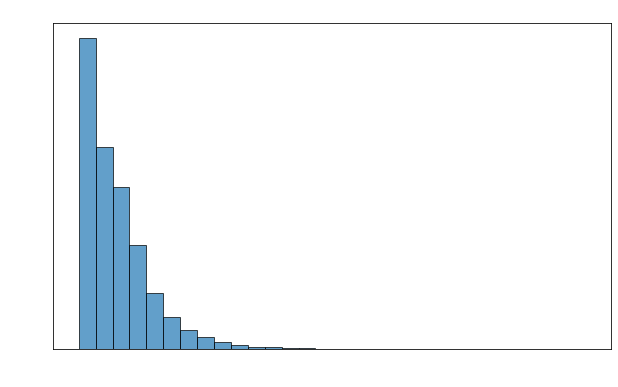

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(df_car['mileage'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Frequency Distribution of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()